In [1]:
import sys
import os
import numpy as np
import pandas as pd
from   sklearn    import metrics
from   matplotlib import pyplot as plt
import pathlib
import json
import shutil

In [2]:
# CSV
pd_res_csv  = pd.read_csv('./Result.csv',dtype={'Type':str,' Sample':np.int64,' Time':np.int64,' MAE':np.float32})

In [3]:
pd_res_map = dict()
columns = ['DEF','RIS','PGDEF','PGNEE','PGRIS','HTDEF','HTNEE','HTRIS']
column_to_labels = dict()
column_to_labels['DEF']  ='PathTracing'
column_to_labels['NEE']  ='PathTracing+NEE'
column_to_labels['RIS']  ='PathTracing+RIS'
column_to_labels['PGDEF']='Müller(2017)'
column_to_labels['PGNEE']='Müller(2017)+NEE'
column_to_labels['PGRIS']='Müller(2017)+RIS'
column_to_labels['HTDEF']='HashTree'
column_to_labels['HTNEE']='HashTree+NEE'
column_to_labels['HTRIS']='HashTree+RIS'
for column in columns:
    if column in set(pd_res_csv['Type']):
        pd_res_map[column] = pd_res_csv[pd_res_csv['Type']==column].iloc[:, [1,2,3]]

print(pd_res_map['DEF'].columns)

Index([' Sample', ' Time', ' MAE'], dtype='object')


In [4]:
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams['font.size'] = 15 # 全体のフォントサイズが変更されます。
plt.rcParams['xtick.labelsize'] = 9 # 軸だけ変更されます。
plt.rcParams['ytick.labelsize'] = 9 # 軸だけ変更されます
plt.rcParams['xtick.direction'] = 'in' # x axis in
plt.rcParams['ytick.direction'] = 'in' # y axis in 
plt.rcParams['axes.linewidth'] = 1.0 # axis line width
plt.rcParams['axes.grid'] = False # make grid
plt.rcParams['legend.fancybox'] = False # 丸角
plt.rcParams['legend.framealpha'] = 1 # 透明度の指定、0で塗りつぶしなし
plt.rcParams['legend.edgecolor'] = 'black' # edgeの色を変更
plt.rcParams['legend.handlelength'] = 1 # 凡例の線の長さを調節
plt.rcParams['legend.labelspacing'] = 1. # 垂直方向の距離の各凡例の距離
plt.rcParams['legend.handletextpad'] = 0.5 # 凡例の線と文字の距離の長さ
plt.rcParams['legend.markerscale'] = 2 # 点がある場合のmarker scale
plt.rcParams['legend.borderaxespad'] = 0. # 凡例の端とグラフの端を合わせる
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_38824\3117286224.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_spp.show()


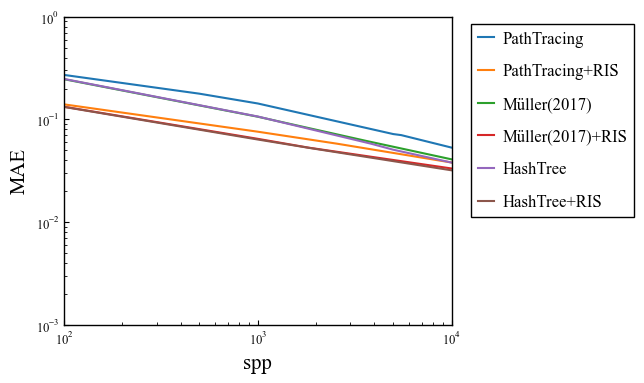

In [5]:
fig_spp = plt.figure(figsize=(5,4))
ax_spp = fig_spp.add_subplot()
for column in columns:
    if column in pd_res_map:
        pd_res_map[column].plot(ax = ax_spp, x=' Sample',y=' MAE', label=column_to_labels[column])
        
ax_spp.legend(bbox_to_anchor=(1.05, 0.85, 0.375, 0.125), loc='upper left', borderaxespad=0, ncol=1,fontsize=12)
ax_spp.set_xlabel("spp")
ax_spp.set_ylabel("MAE")
ax_spp.set_xlim(100,10000)
ax_spp.set_ylim(0.001,1.0)
ax_spp.set_xscale('log')
ax_spp.set_yscale('log')
fig_spp.show()
fig_spp.savefig('result_fig_spp_cornell.eps', bbox_inches='tight')

C:\Users\user\AppData\Local\Temp\ipykernel_38824\1710196397.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_sec.show()


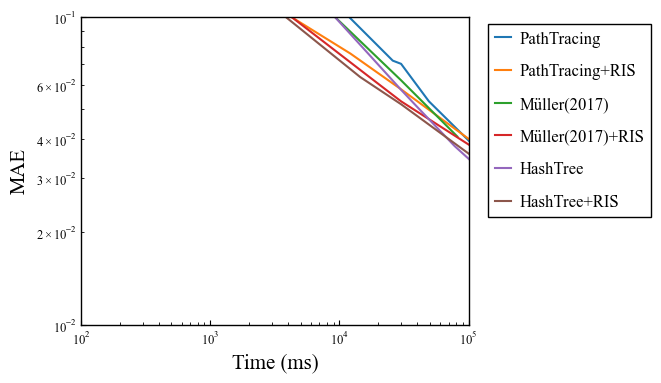

In [9]:
fig_sec = plt.figure(figsize=(5,4))
ax_sec = fig_sec.add_subplot()
for column in columns:
    if column in pd_res_map:
        pd_res_map[column].plot(ax = ax_sec, x=' Time',y=' MAE', label=column_to_labels[column])
        
ax_sec.legend(bbox_to_anchor=(1.05, 0.85, 0.375, 0.125), loc='upper left', borderaxespad=0, ncol=1,fontsize=12)
ax_sec.set_xlabel("Time (ms)")
ax_sec.set_ylabel("MAE")
ax_sec.set_xlim(100,100000)
ax_sec.set_ylim(0.01,0.1)
ax_sec.set_xscale('log')
ax_sec.set_yscale('log')
fig_sec.show()
fig_sec.savefig('result_fig_sec_cornell.eps', bbox_inches='tight')

In [7]:
cur_dir = os.getcwd()
print(cur_dir)
dir_for_copys = []
dir_for_copys.append('DEF')
for res_dir in os.listdir(cur_dir):
    if os.path.isdir(res_dir):
        for json_dir in os.listdir(res_dir):
            if (pathlib.Path(json_dir).suffix == ".json") and pathlib.Path(json_dir).name != "scene.json":
                stem = pathlib.Path(json_dir).stem
                splits = stem.split('_')
                json_file = open(cur_dir+'\\'+res_dir+'\\'+json_dir, 'r')
                json_data = json.load(json_file)
                bin_file_path = json_data['BinFilePath']
                samples = int(json_data['Samples'])
                time = int(json_data['Time'])
                width = int(json_data['Width'])
                height = int(json_data['Height'])
                if time > 29900 and 30100 > time :
                    dir_for_copys.append(res_dir)

print(dir_for_copys)
os.makedirs(cur_dir+'_comp')
for dir in dir_for_copys:
    shutil.copytree(cur_dir+'\\'+dir, cur_dir+'_comp\\'+dir)

d:\Users\shumpei\Document\Github\RTLib\Result\Fix\Scene4\Depth=4
['DEF', '09-26-22-20-45-29', '09-26-22-20-47-25', '09-26-22-20-55-59', '09-26-22-21-02-59', '09-26-22-21-14-32', '09-26-22-21-30-56']


FileExistsError: [WinError 183] 既に存在するファイルを作成することはできません。: 'd:\\Users\\shumpei\\Document\\Github\\RTLib\\Result\\Fix\\Scene4\\Depth=4_comp'